In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

con = sqlite3.connect('output/database.sqlite')
data = pd.read_sql("SELECT *  \
FROM Scorecard \
WHERE 1 = 1 \
AND md_earn_wne_p6 != 'PrivacySuppressed' AND md_earn_wne_p6 IS NOT NULL \
", con)
#Year = 2011



In [2]:
cols_target = ['md_earn_wne_p6']

cols_school = ['PREDDEG', 'HIGHDEG', 'CONTROL', 'NUMBRANCH', 'AVGFACSAL']
#                'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10',
#                'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16',
#                'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26',
#                'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39',
#                'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45',
#                'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51',
#                'PCIP52', 'PCIP54']

# cols_admissions = ['ADM_RATE', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SAT_AVG']
cols_admissions = ['ADM_RATE', 'SAT_AVG']


cols_costs = ['TUITFTE']

cols_studentbody = ['UGDS', 'UGDS_NRA', 'PPTUG_EF', 'UG25abv',
                    'PAR_ED_PCT_1STGEN', 'DEP_INC_AVG', 'IND_INC_AVG',
                    'COMP_ORIG_YR2_RT', 'WDRAW_ORIG_YR2_RT', 'ENRL_ORIG_YR2_RT',
                    'COMP_ORIG_YR4_RT', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT',
                    'OVERALL_YR2_N', 'OVERALL_YR3_N', 'OVERALL_YR4_N',
                    'OVERALL_YR6_N', 'OVERALL_YR8_N', 'count_nwne_p6']

cols_financialaid = ['DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN']

cols_other = []
#['type']


    
data_reduced = data[cols_target+cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other]

#data_reduced = data[data.describe().columns]


In [3]:
from sklearn import preprocessing
catconv = preprocessing.LabelEncoder()


data_reduced['PREDDEG_N'] = catconv.fit_transform(data_reduced.PREDDEG)
data_reduced['HIGHDEG_N'] = catconv.fit_transform(data_reduced.HIGHDEG)
data_reduced['CONTROL_N'] = catconv.fit_transform(data_reduced.CONTROL)

cols_school = ['PREDDEG_N', 'HIGHDEG_N', 'CONTROL_N', 'NUMBRANCH', 'AVGFACSAL']

In [5]:
cols = cols_target+cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other
    
for c in data_reduced.columns:
    if (data_reduced[c].dtype == object) and (c != 'type'):
        data_reduced[c] = data_reduced[c].apply(lambda x: x if x != 'PrivacySuppressed'  else np.nan)
        #data_reduced[c] = data_reduced[c].astype(float)
        
data_reduced.dropna(inplace=True)
#
data_reduced.describe()#.to_csv('summary.csv')

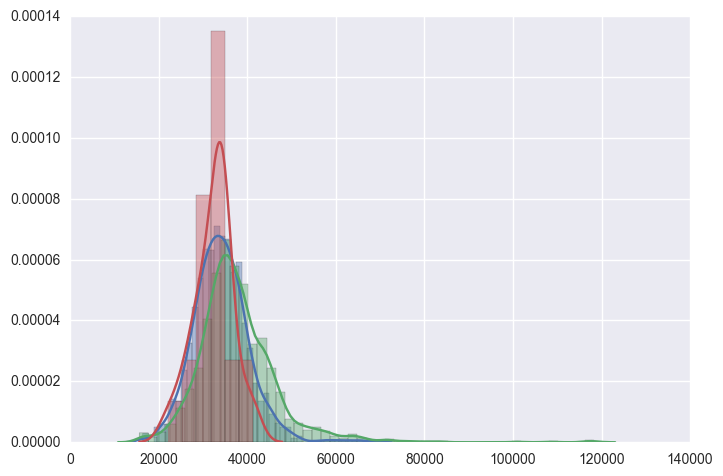

In [6]:
# explore response variable for lineriatry
plt.figure()
#sns.distplot(data_reduced[cols_target])
sns.distplot(data_reduced[data.CONTROL=='Public'][cols_target], label ='Public')
sns.distplot(data_reduced[(data.CONTROL=='Private nonprofit')][cols_target], label='Private nonprofit')
sns.distplot(data_reduced[(data.CONTROL=='Private for-profit')][cols_target] , label= 'Private for-profit')
plt.label = 'Salary Deistribution 6 Years after graduation'




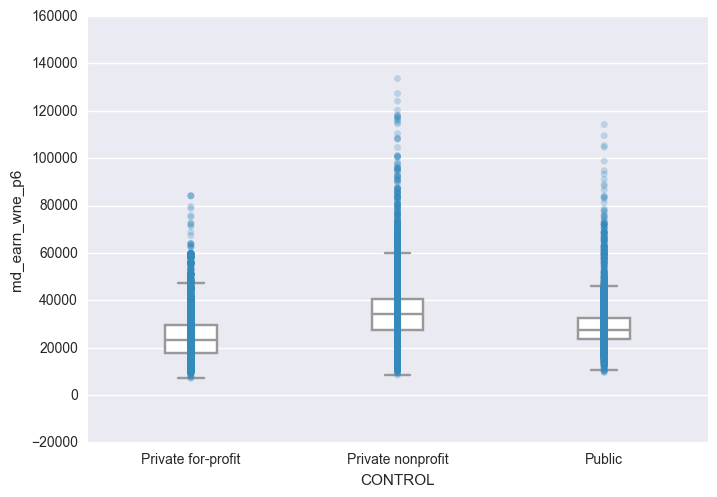

In [7]:
sns.boxplot(x="CONTROL", y="md_earn_wne_p6", data=data,
            order=np.sort(data_reduced.CONTROL.unique()), color='White',
            fliersize=0, width=0.25)
sns.stripplot(x="CONTROL", y="md_earn_wne_p6", data=data,
              order=np.sort(data_reduced.CONTROL.unique()),
              alpha=0.25, size=5,
              color='#348ABD', edgecolor='#348ABD')

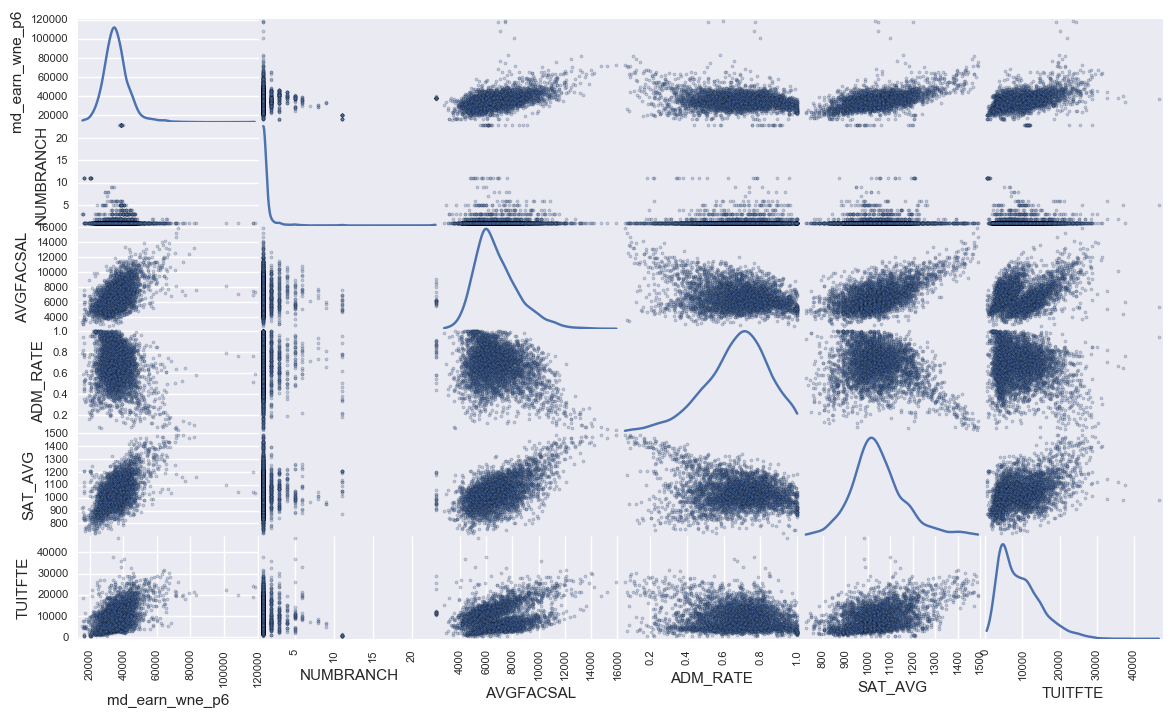

In [8]:
#6 by 6 matrix
pd.scatter_matrix(data_reduced[['md_earn_wne_p6', 'NUMBRANCH', 'AVGFACSAL', 'ADM_RATE', 'SAT_AVG', 'TUITFTE']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

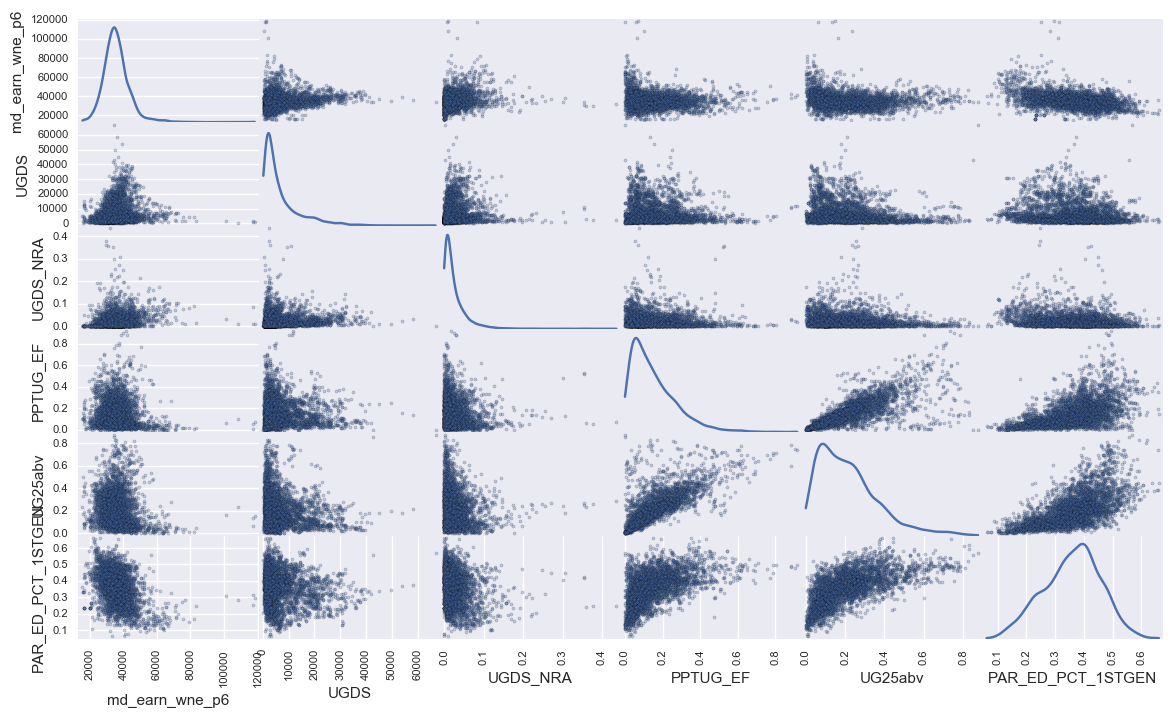

In [9]:
pd.scatter_matrix(data_reduced[['md_earn_wne_p6', 'UGDS','UGDS_NRA', 'PPTUG_EF', 'UG25abv', 'PAR_ED_PCT_1STGEN']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

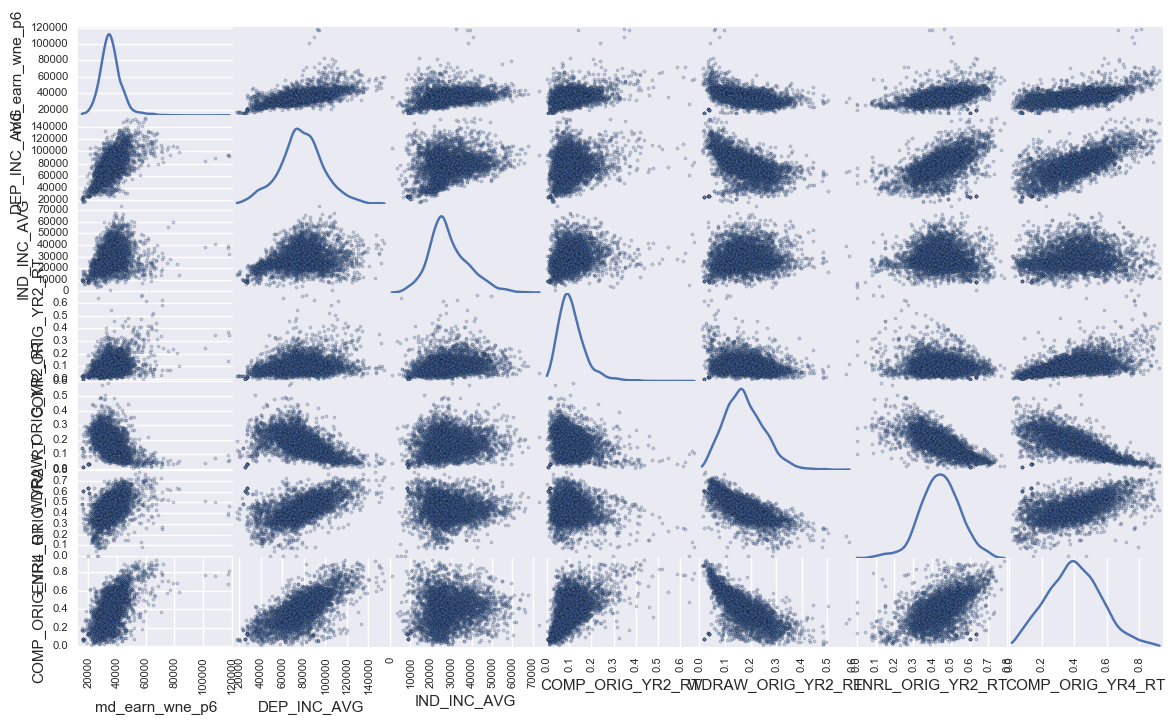

In [10]:
pd.scatter_matrix(data_reduced[['md_earn_wne_p6', 'DEP_INC_AVG','IND_INC_AVG', 'COMP_ORIG_YR2_RT', 'WDRAW_ORIG_YR2_RT', 'ENRL_ORIG_YR2_RT', 'COMP_ORIG_YR4_RT']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

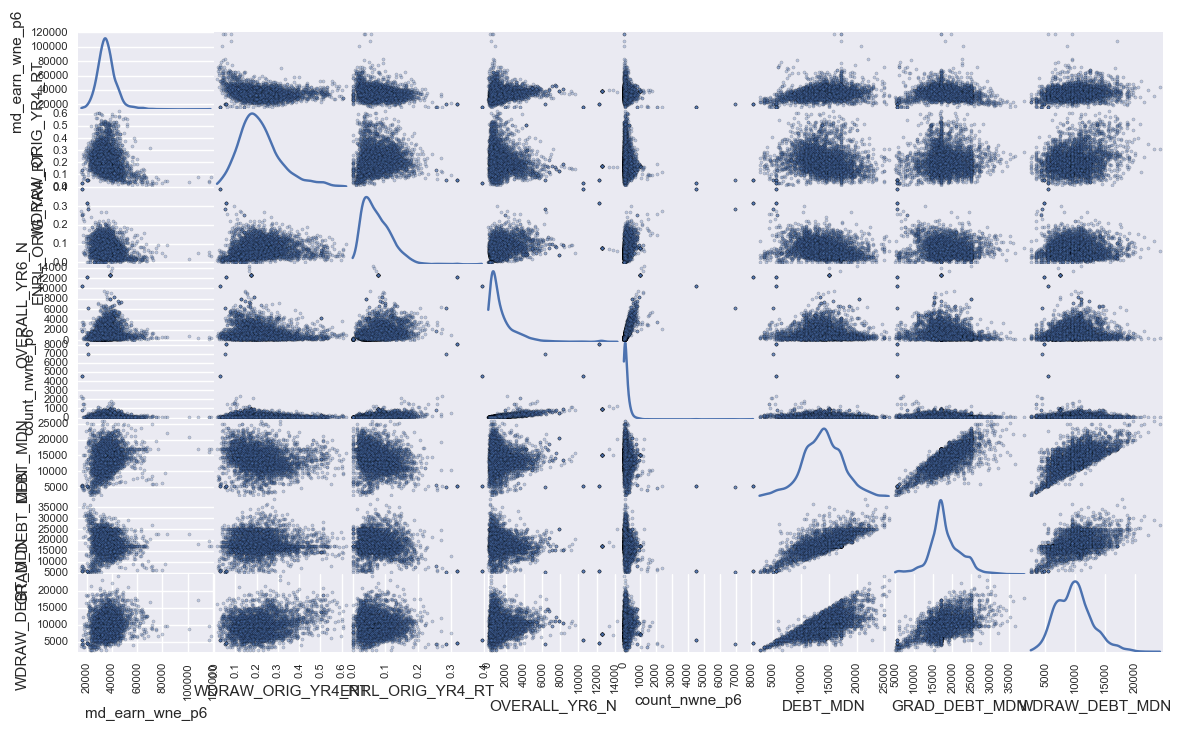

In [11]:
pd.scatter_matrix(data_reduced[['md_earn_wne_p6', 'WDRAW_ORIG_YR4_RT', 'ENRL_ORIG_YR4_RT',  'OVERALL_YR6_N',  'count_nwne_p6', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [ ]:

#data_reduced.drop('PREDDEG', axis=1, inplace=True)
#data_reduced.drop('HIGHDEG', axis=1, inplace=True)
#data_reduced.drop('CONTROL', axis=1, inplace=True)
#data_reduced.to_csv('extract.csv')

### Preprocessing 

In [12]:


#Scale the features and center 
from sklearn import preprocessing
cols = cols_target+['NUMBRANCH', 'AVGFACSAL']+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other
 
X = data_reduced[cols]

X.dropna(inplace=True)

X_scaled = preprocessing.scale(X[['NUMBRANCH', 'AVGFACSAL']+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other])
y = X[cols_target].values

print pd.DataFrame(X_scaled).shape
print y.shape

(3813, 27)
(3813, 1)


Recursive feature elimination

Recursive feature elimination is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

The stability of RFE depends heavily on the type of model that is used for feature ranking at each iteration. Just as non-regularized regression can be unstable, so can RFE when utilizing it, while using ridge regression can provide more stable results.

Sklearn provides RFE for recursive feature elimination and RFECV for finding the ranks together with optimal number of features via a cross validation loop.

In [ ]:
##http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
np.random.seed(0)
 

X = X_scaled
 
 
names = cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other

 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_scaled, y)
ranks["Linear reg"] = rank_to_dict(map(lambda x: round(x, 4), rfe.ranking_) , names)

ridge = Ridge(alpha=0.1)
rfe = RFE(ridge, n_features_to_select=1)
rfe.fit(X_scaled,y)
ranks["Ridge"] = rank_to_dict(map(lambda x: round(x, 4), rfe.ranking_) , names)

 

lasso = Lasso(alpha=.05)
lasso.fit(X_scaled,y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 

#stop the search when 5 features are left (they will get equal scores)

rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X_scaled,y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X_scaled, y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)


rf = RandomForestRegressor()
rf.fit(X_scaled,y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

f, pval  = f_regression(X_scaled, y, center=True)
ranks["Corr."] = rank_to_dict(f, names)


mine = MINE()
mic_scores = []
#for i in range(X.shape[1]):
     #mine.compute_score(X[:,i], y)
     #m = mine.mic()
     #mic_scores.append(m)
 
#ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))
 



To Evaluate variables I created a matrix of regressors and messured fature imortance.

* Corr 
F-regression  computes the F statistic and pick the best features. F-regression does the following:
- Start with a constant model, M0
- Try all models M1 consisting of just one feature and pick the best according to the F statistic
- Try all models M2 consisting of M1 plus one other feature and pick the best ...

*  Recursive Feature Elimination (RFE) Recursive feature elimination is based on the idea to repeatedly construct a model (for example an SVM or a regression model) and choose either the best or worst performing feature (for example based on coefficients), setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. Features are then ranked according to when they were eliminated. As such, it is a greedy optimization for finding the best performing subset of features.

Additionally I look at 

- Linear Regression
- Ridge Regression
- Randomized Lasso 
- Random Forest 


 

From the list of columns and its scores  I see some interesting obesvations:
- Stability. Using Ridge regression for data interpretation due to its stability and the fact that useful features tend to have non-zero coefficients. 

Following features have low stability ( coefficients close to 0) and can be removed:
* Percentage of undergraduates aged 25 and above	UG25abv
* Number of students in overall 3-year completion cohort	OVERALL_YR3_N

In previous tests I observed that Random Forests have the best predictive power messured by Median SQ Error MSE. 
Using Random Forest Feature Importances I can see tha following Features are most important:
Average family income of dependent students in real 2014 dollars.	 DEP_INC_AVG <br>
Percent who transferred to a 4-year institution and completed within 4 years	COMP_ORIG_YR4_RT <br>
Average family income of independent students in real 2015 dollars.	IND_INC_AVG <br>
Average SAT equivalent score of students admitted	SAT_AVG <br>
Percent still enrolled at original institution within 2 years	ENRL_ORIG_YR2_RT <br>
Enrollment of undergraduate certificate/degree-seeking students	UGDS <br>
Percent withdrawn from original institution within 2 years WDRAW_ORIG_YR2_RT <br>
The median debt for students who have completed	GRAD_DEBT_MDN <br>
Percent completed within 2 years at original institution	COMP_ORIG_YR2_RT <br>
Percentage first-generation students	 PAR_ED_PCT_1STGEN <br>
Tuition revenue per full-time equivalent student	TUITFTE <br>


In [14]:
# Benchmark Model

# Training seize 60%  3,813.00  - 1,525 = 2288

#A benchmark model is provided that relates to the domain, problem statement, and intended solution. Ideally, the student's benchmark model provides context for existing methods or known information in the domain and problem given, which can then be objectively compared to the student's solution. The benchmark model is clearly defined and measurable.

valid_columns = ['SAT_AVG']

from sklearn import linear_model

clf  = linear_model.LinearRegression()
clf.fit(data_reduced[valid_columns][:2288], data_reduced['md_earn_wne_p6'][:2288])
clf.predict(data_reduced[valid_columns][2288:])

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(data_reduced[valid_columns][2288:]) - data_reduced['md_earn_wne_p6'][2288:]) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(data_reduced[valid_columns][2288:], data_reduced['md_earn_wne_p6'][2288:]))

Mean squared error: 45721737.61
Variance score: 0.25


Outside benchmark is not available for this problem so I will use liner regression trained on Average SAT score and has very high MSE score and 0% accuracy.  I am using SAT score because of its strong correlation to response variable and because of assumption that higher SAT score will lead to acceptance into highly ranked school, which according to traditionally held belief will result in high earnings after graduation. 

After running Liner Regression on available data following benchmark values are obtained:
Mean squared error: 102776319.79
Variance score: 0.09


## Implementation
To predict future earnings I chose to use following classifiers 

•	LinearRegression

•	Ridge Regression including Cross-Validation

•	Lasso including Lasso Lars Cross-Validation

•	RandomForestRegressor 

Linear Regression is useful predictor, but it can suffers from collinearity. With each regressor that exposes Coefficient estimates I will report on them. Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix X have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares. 

The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True 



#### Training and Testing Data 

In [15]:
from sklearn.model_selection import train_test_split
#Separte data into training and test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split (data_reduced[cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other], data_reduced['md_earn_wne_p6'], test_size=0.4, random_state=0 )
X_train.shape, X_test.shape

((2287, 30), (1526, 30))

In [16]:
# Implement Regression models
#Linear Regression
from sklearn import linear_model

clf  = linear_model.LinearRegression()
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))




('Coefficients: \n', array([  1.80016081e+02,  -1.96330975e+02,  -4.03554935e+02,
         1.39686648e+02,   1.43961216e+00,  -1.67714357e+03,
         1.17956720e+01,   2.18580363e-01,  -1.38440257e-01,
        -9.74054722e+01,   1.45878956e+03,   2.56903407e+03,
         9.12963500e+03,   8.54041721e-02,   9.66350489e-02,
         1.37768816e+04,  -8.53906414e+03,   5.03753758e+03,
         8.63893030e+03,   1.04831420e+04,   3.46116920e+04,
        -3.64801654e-02,   8.63719202e-01,   5.88812697e-01,
         1.26892089e+00,  -2.60597453e+00,  -4.08840147e+00,
         2.41186611e-02,  -3.68519530e-01,   4.17415233e-02]))
Mean squared error: 25256789.41
Variance score: 0.60


In [17]:
from sklearn import linear_model

clf = linear_model.Ridge(alpha = .5)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))




('Coefficients: \n', array([  6.33527887e+02,  -1.12448604e+02,  -2.83652235e+02,
         1.30323838e+02,   1.45163825e+00,  -1.69079184e+03,
         1.15978370e+01,   2.18143559e-01,  -1.35366258e-01,
        -2.40496077e+02,   1.72507010e+03,   3.05403731e+03,
         8.09882241e+03,   8.33254136e-02,   9.65196469e-02,
         1.42581137e+04,  -5.06510433e+03,   7.19441902e+03,
         5.36787971e+03,   5.89807562e+03,   2.32650427e+04,
         1.87311118e-02,   8.40973743e-01,   5.40719021e-01,
         1.24608830e+00,  -2.53332906e+00,  -3.90439889e+00,
         3.47312005e-02,  -3.81961302e-01,   5.94347269e-02]))
Mean squared error: 25337600.80
Variance score: 0.60


In [18]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Accuracy score: %.2f' % clf.score(X_test, y_test))




('Coefficients: \n', array([  1.86885599e+02,  -1.93369650e+02,  -4.00180733e+02,
         1.39281118e+02,   1.44010787e+00,  -1.67605997e+03,
         1.17850589e+01,   2.18445027e-01,  -1.38505763e-01,
        -3.71759917e+00,   1.44687427e+03,   2.57489684e+03,
         9.09056081e+03,   8.54922888e-02,   9.67660834e-02,
         1.38202162e+04,  -8.34456158e+03,   5.11668269e+03,
         8.49767598e+03,   1.02666259e+04,   3.43134543e+04,
        -3.42076451e-02,   8.63343066e-01,   5.87942959e-01,
         1.26792281e+00,  -2.60497745e+00,  -4.08460233e+00,
         2.52961359e-02,  -3.69321889e-01,   4.23681773e-02]))
Mean squared error: 25258307.83
Accuracy score: 0.60


In [19]:
from sklearn.ensemble import RandomForestRegressor
#line_a = np.linspace(0.1,10)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)

#The coefficients
print('Coefficients: \n', clf.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))

print('Accuracy score: %.2f' % clf.score(X_test, y_test))
#print('Best Alpha found: %.2f' %clf.alpha_)




('Coefficients: \n', array([ 0.00072931,  0.00107611,  0.00099185,  0.0012527 ,  0.07411149,
        0.03598608,  0.06818044,  0.01839792,  0.01493084,  0.01442523,
        0.01745336,  0.01508462,  0.01735729,  0.25681876,  0.06171211,
        0.03326246,  0.02009112,  0.02927581,  0.17418329,  0.0214588 ,
        0.01820246,  0.01008817,  0.0061406 ,  0.00645459,  0.00647306,
        0.01312293,  0.01734732,  0.0138622 ,  0.02388149,  0.00764759]))
Mean squared error: 18003431.90
Accuracy score: 0.72


## Refinement

In hopes of  improve accuracy of the models and since number of models used require parameter to be passed specified I will use Cross-Validation with Ridge Regression and Lasso Lars. For Random forest I will use bootstrapping. 


### Ridge Regression Cross-Validation

In [20]:
from sklearn import linear_model

clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Accuracy score: %.2f' % clf.score(X_test, y_test))
print('Best Alpha found: %.2f' %clf.alpha_)





('Coefficients: \n', array([  3.03437249e+02,  -1.73318039e+02,  -3.69281489e+02,
         1.36967889e+02,   1.44158006e+00,  -1.67814645e+03,
         1.17464556e+01,   2.18741417e-01,  -1.37962818e-01,
        -1.70784665e+02,   1.53594101e+03,   2.68019384e+03,
         8.88930112e+03,   8.69331360e-02,   9.63544846e-02,
         1.42530144e+04,  -7.31069972e+03,   5.93290348e+03,
         7.52686935e+03,   9.00308205e+03,   3.12726498e+04,
        -2.04012394e-02,   8.55484724e-01,   5.76564789e-01,
         1.26049930e+00,  -2.58398938e+00,  -4.03677779e+00,
         2.65838802e-02,  -3.70760918e-01,   4.62255478e-02]))
Mean squared error: 25264868.54
Accuracy score: 0.60
Best Alpha found: 0.10


### LassoLarsCV

In [21]:
from sklearn import linear_model
#line_a = np.linspace(0.1,10)
clf = linear_model.LassoLarsCV(cv=20)
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test, y_test))
print('Best Alpha found: %.2f' %clf.alpha_)





('Coefficients: \n', array([  1.03505025e+02,  -1.47545082e+02,  -3.01028546e+02,
         1.36837080e+02,   1.42184711e+00,  -1.64201500e+03,
         1.12757954e+01,   2.21076581e-01,  -1.23988138e-01,
         0.00000000e+00,   1.44469271e+03,   2.63253195e+03,
         8.62583201e+03,   8.62165426e-02,   9.76771772e-02,
         1.49909605e+04,  -6.74870045e+03,   6.41158326e+03,
         7.49355852e+03,   8.86992969e+03,   3.11596496e+04,
         0.00000000e+00,   7.45626629e-01,   5.57085538e-01,
         9.29304059e-01,  -2.19981721e+00,  -3.73719221e+00,
         1.43664500e-02,  -3.54661680e-01,   4.36152049e-02]))
Mean squared error: 25191547.86
Variance score: 0.60
Best Alpha found: 0.20


### RandomForestRegressor with Bootstrap

In [22]:
from sklearn.ensemble import RandomForestRegressor
#line_a = np.linspace(0.1,10)
clf = RandomForestRegressor(n_estimators=100, bootstrap=True)
clf.fit(X_train, y_train)

#The coefficients
print('Coefficients: \n', clf.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test) - y_test) ** 2))

print('Accuracy score: %.2f' % clf.score(X_test, y_test))
#print('Best Alpha found: %.2f' %clf.alpha_)




('Coefficients: \n', array([  1.76687820e-04,   7.23823531e-04,   1.35504168e-03,
         1.09743345e-03,   7.66324672e-02,   3.11720957e-02,
         6.71742899e-02,   1.78276087e-02,   1.51604067e-02,
         1.44080274e-02,   1.73591344e-02,   1.48575991e-02,
         1.84229457e-02,   2.63971668e-01,   6.19638137e-02,
         3.07503176e-02,   1.80319320e-02,   2.84880605e-02,
         1.74923220e-01,   2.15371251e-02,   1.58816600e-02,
         9.68672361e-03,   7.25023054e-03,   6.45000003e-03,
         8.73076983e-03,   1.11382062e-02,   2.01149518e-02,
         1.12654508e-02,   2.50960293e-02,   8.35227930e-03]))
Mean squared error: 17655114.07
Accuracy score: 0.72


## Model Evaluation and Validation


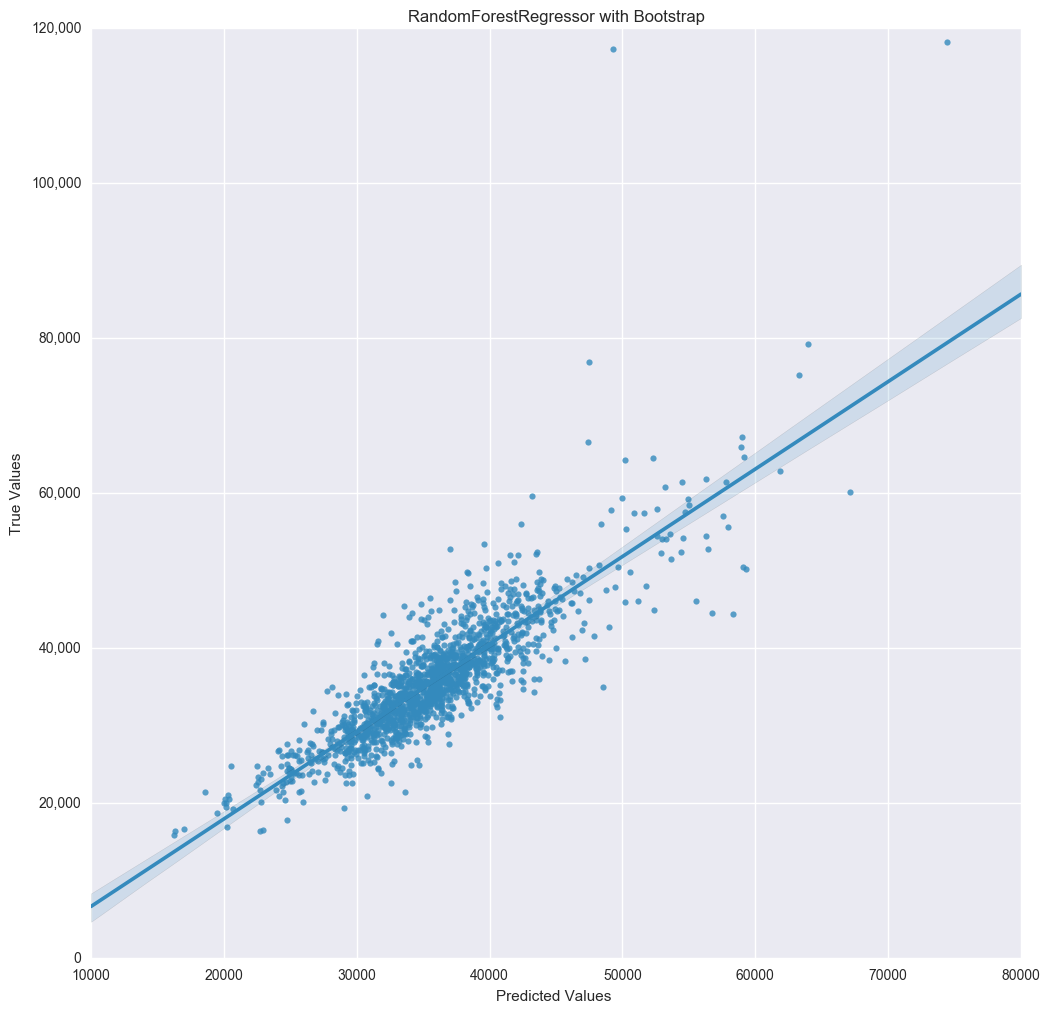

In [23]:
plt.figure(figsize=(12, 12))

sns.regplot(x=clf.predict(X_test), y=y_test, color='#348ABD');

plt.title('RandomForestRegressor with Bootstrap')
plt.xlabel('Predicted Values ')
plt.ylabel('True Values')

plt.ylim(0, 120000);

plt.gca().get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda y, p: format(int(y), ','))
)



In [24]:
##http://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/

from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
np.random.seed(0)
 
X = X_scaled
y = data_reduced['md_earn_wne_p6']

 
 
names = cols_school+cols_admissions+cols_costs+\
                    cols_studentbody+cols_financialaid+cols_other

 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["Linear reg"] = rank_to_dict(map(lambda x: round(x, 4), lr.coef_) , names)

ridge = Ridge(alpha=0.1)
ridge.fit(X,y)
ranks["Ridge"] = rank_to_dict(map(lambda x: round(x, 4), ridge.coef_) , names)
 
 
RandomForestRegressor = RandomForestRegressor(n_estimators=100 , bootstrap= True)
RandomForestRegressor.fit(X,y)
ranks["RFR"] = rank_to_dict(np.abs(RandomForestRegressor.feature_importances_), names)
 
 
 
r = {}
for name in ranks["Ridge"].keys():
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in ranks["Ridge"].keys():
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))
 






	Linear reg	RFR	Ridge	Mean
SAT_AVG	0.6	0.05	0.6	0.42
ADM_RATE	0.45	0.09	0.45	0.33
WDRAW_ORIG_YR2_RT	0.79	0.07	0.79	0.55
NUMBRANCH	0.81	0.22	0.81	0.61
ENRL_ORIG_YR4_RT	0.82	0.03	0.82	0.56
COMP_ORIG_YR2_RT	0.88	0.59	0.88	0.78
PREDDEG_N	0.63	0.0	0.63	0.42
count_nwne_p6	0.6	0.03	0.61	0.41
UG25abv	0.77	0.25	0.77	0.6
OVERALL_YR8_N	0.31	0.1	0.31	0.24
IND_INC_AVG	0.64	0.13	0.64	0.47
OVERALL_YR6_N	0.62	0.04	0.62	0.43
UGDS_NRA	0.75	0.06	0.75	0.52
PAR_ED_PCT_1STGEN	0.7	0.09	0.7	0.5
COMP_ORIG_YR4_RT	0.55	0.02	0.55	0.37
UGDS	0.66	0.06	0.66	0.46
HIGHDEG_N	0.96	0.25	0.97	0.73
AVGFACSAL	0.82	0.07	0.82	0.57
DEP_INC_AVG	0.46	0.06	0.46	0.33
OVERALL_YR2_N	1.0	0.03	1.0	0.68
PPTUG_EF	0.89	1.0	0.89	0.93
OVERALL_YR3_N	0.0	0.04	0.0	0.01
OVERALL_YR4_N	0.28	0.11	0.28	0.22
WDRAW_ORIG_YR4_RT	0.68	0.03	0.68	0.46
CONTROL_N	0.53	0.06	0.53	0.37
ENRL_ORIG_YR2_RT	0.86	0.05	0.86	0.59
TUITFTE	0.63	0.07	0.63	0.44


# V. Conclusion

### Free-Form Visualization


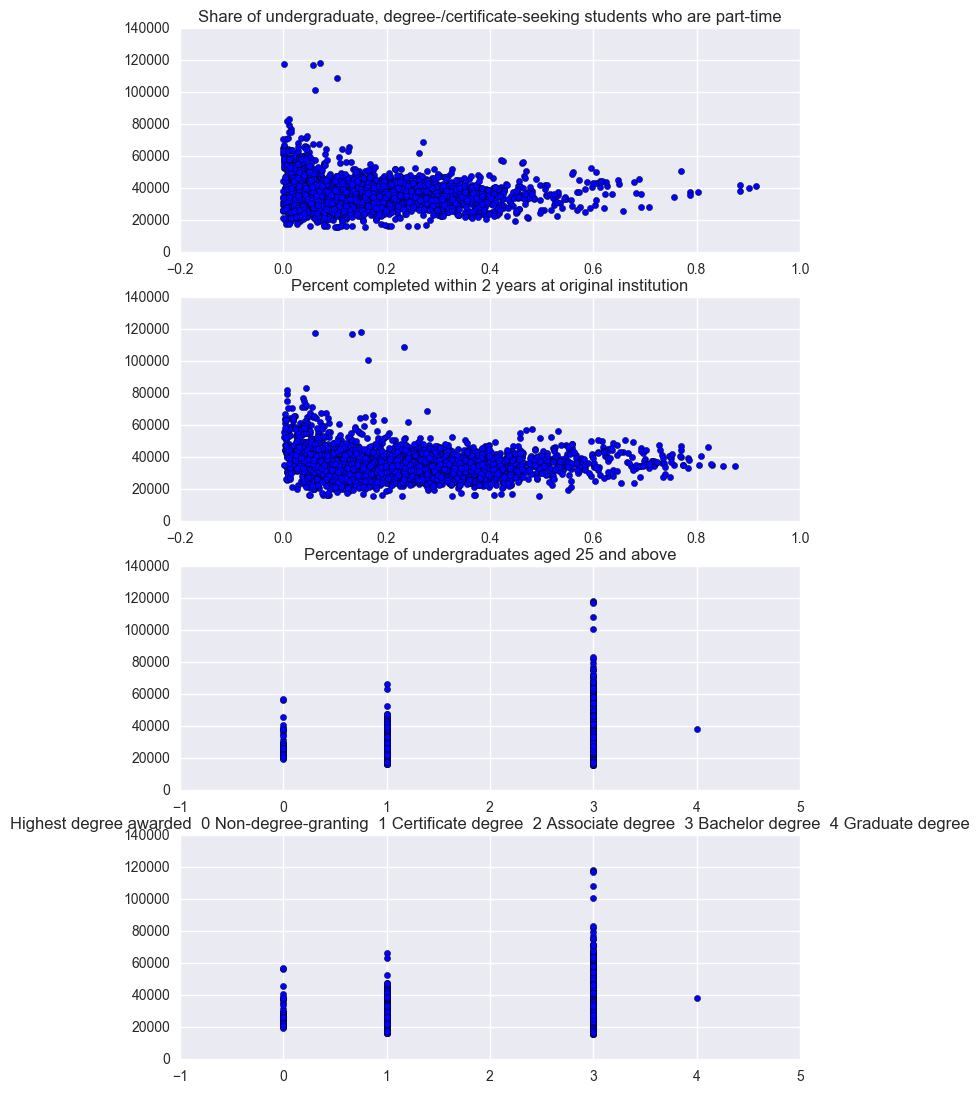

In [25]:
# display 4 important variables 

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=False, sharey=True)
#colors = {'0':'red', '1':'blue', '2':'green' }
#c=data_reduced.CONTROL_N.apply(lambda x: colors[x])

ax1.set_title('Share of undergraduate, degree-/certificate-seeking students who are part-time')
ax1.scatter(data_reduced.PPTUG_EF, data_reduced.md_earn_wne_p6 )
ax2.set_title('Percent completed within 2 years at original institution')
ax2.scatter(data_reduced.UG25abv , data_reduced.md_earn_wne_p6 )
ax3.set_title('Percentage of undergraduates aged 25 and above')
ax3.scatter(data_reduced.HIGHDEG_N, data_reduced.md_earn_wne_p6 )
ax4.set_title('Highest degree awarded \
 0 Non-degree-granting \
 1 Certificate degree \
 2 Associate degree \
 3 Bachelor degree \
 4 Graduate degree')
ax4.scatter(data_reduced.HIGHDEG_N, data_reduced.md_earn_wne_p6)

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(top=2)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)



